# The CIFAR-10 dataset

The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10
classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets
provides 10,000 images. This image taken from the CIFAR repository (https://www.cs.toronto.edu/~kriz/cifar.ht
ml) describes a few random examples from the 10 classes:
<img src="cifar.jpg">


The goal is to recognize previously unseen images and assign them to one of the 10 classes. Let us
define a suitable deep net

In [8]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

### Defining Parameters

In [9]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop() #Adam()

### Load dataset

In [10]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### One-hot encoding and normalize the images

In [11]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Convolutional Network

In [6]:
#network
model = Sequential()

# Convolutional
model.add(Conv2D(32, (3, 3), padding='same',                        # 32 convolutional filters, each of which
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))   # with a 3 x 3 size
model.add(Activation('relu'))

# Maxpooling + Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))                           # max-pooling operation with pool size 2 x 2
model.add(Dropout(0.25))                                            # dropout at 25% 

model.add(Flatten())

model.add(Dense(512))                                               # dense network with 512 units
model.add(Activation('relu'))                                       # ReLU activation
model.add(Dropout(0.5))                                             # dropout at 50%  

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))                                    # softmax layer with 10 classes as output
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
___________________________

### Training the model
- **Training**: it is used to build our models,
- **Validation**: it is used to select the best performing approach
- **Test**: it is to check the performance of our best models on fresh unseen data

In [10]:
# Compile
model.compile(loss='categorical_crossentropy', 
              optimizer=OPTIM,
              metrics=['accuracy'])
#Train
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=NB_EPOCH, 
          validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE)
#Test
score = model.evaluate(X_test, Y_test,
                       batch_size=BATCH_SIZE, 
                       verbose=VERBOSE)
#Print Result
print("Test score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 35s 878us/step - loss: 0.6119 - acc: 0.7881 - val_loss: 1.0822 - val_acc: 0.6700
Epoch 2/20
40000/40000 [==============================] - 35s 871us/step - loss: 0.5869 - acc: 0.7994 - val_loss: 1.0514 - val_acc: 0.6770
Epoch 3/20
40000/40000 [==============================] - 36s 905us/step - loss: 0.5749 - acc: 0.8031 - val_loss: 1.0790 - val_acc: 0.6657
Epoch 4/20
40000/40000 [==============================] - 37s 927us/step - loss: 0.5634 - acc: 0.8089 - val_loss: 1.1728 - val_acc: 0.6491
Epoch 5/20
40000/40000 [==============================] - 40s 1ms/step - loss: 0.5547 - acc: 0.8109 - val_loss: 1.1653 - val_acc: 0.6692
Epoch 6/20
40000/40000 [==============================] - 37s 914us/step - loss: 0.5459 - acc: 0.8160 - val_loss: 1.1520 - val_acc: 0.6842
Epoch 7/20
40000/40000 [==============================] - 34s 861us/step - loss: 0.5230 - acc: 0.8256 - val_loss: 1.13

**Observation:** At each iteration the accuracy improves. 
                At the end of Training we have: 
    - Traning: Accuracy = 85.43%
    - Validation: Accuracy = 67.23%

### Plot Results

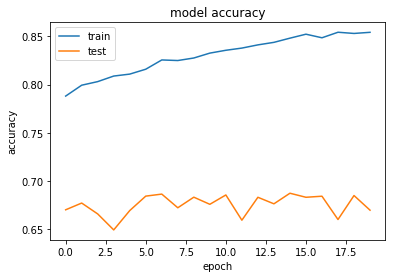

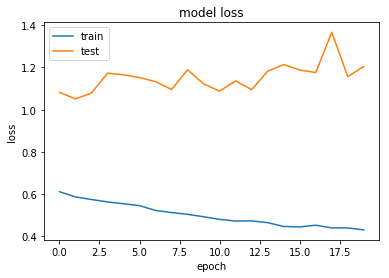

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save the architecture of the model (optional)

In [13]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
#And the weights learned by our deep network on the training set
model.save_weights('cifar10_weights.h5', overwrite=True)

## <font color='brown'> Improving the Network:</font> Deeper Network with Multiple Convolutional Operations

One way to improve the performance is to define a deeper network with multiple convolutional
operations.In this example, we have a sequence of modules

        conv+conv+maxpool+dropout+conv+conv+maxpool

In [12]:
#network
model = Sequential()

# Convolutional
model.add(Conv2D(32, kernel_size=3, padding='same',                        # 32 convolutional filters, each of which
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))   # with a 3 x 3 size
model.add(Activation('relu'))

# Convolutional
model.add(Conv2D(32, kernel_size=3, padding='same'))                       # 32 convolutional filters, each of which
model.add(Activation('relu'))                                       # with a 3 x 3 size

# Maxpooling + Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))                           # max-pooling operation with pool size 2 x 2
model.add(Dropout(0.25))                                            # dropout at 25% 

# Convolutional
model.add(Conv2D(64, kernel_size=3, padding='same'))                       # 64 convolutional filters, each of which
model.add(Activation('relu'))                                       # with a 3 x 3 size

# Convolutional
model.add(Conv2D(64, kernel_size=3, padding='same'))                       # 64 convolutional filters, each of which
model.add(Activation('relu'))                                       # with a 3 x 3 size

# Maxpooling + Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))                           # max-pooling operation with pool size 2 x 2
model.add(Dropout(0.25))                                            # dropout at 25% 

model.add(Flatten())

model.add(Dense(512))                                               # dense network with 512 units
model.add(Activation('relu'))                                       # ReLU activation
model.add(Dropout(0.5))                                             # dropout at 50%  

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))                                    # softmax layer with 10 classes as output

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

### Compile, Training, Testing

In [13]:
NB_EPOCH = 40   # change the NB_EPOCH from 20 to 40
# Compile
model.compile(loss='categorical_crossentropy', 
              optimizer=OPTIM,
              metrics=['accuracy'])
#Train
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, 
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
#Test
score = model.evaluate(X_test, Y_test,
                       batch_size=BATCH_SIZE, 
                       verbose=VERBOSE)
#Print Result
print("Test score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 104s 3ms/step - loss: 1.7739 - acc: 0.3611 - val_loss: 1.4153 - val_acc: 0.4931
Epoch 2/40
40000/40000 [==============================] - 103s 3ms/step - loss: 1.3236 - acc: 0.5278 - val_loss: 1.2084 - val_acc: 0.5927
Epoch 3/40
40000/40000 [==============================] - 101s 3ms/step - loss: 1.1173 - acc: 0.6055 - val_loss: 1.0314 - val_acc: 0.6421
Epoch 4/40
40000/40000 [==============================] - 104s 3ms/step - loss: 0.9718 - acc: 0.6610 - val_loss: 0.8540 - val_acc: 0.7000
Epoch 5/40
40000/40000 [==============================] - 102s 3ms/step - loss: 0.8802 - acc: 0.6947 - val_loss: 0.8595 - val_acc: 0.7040
Epoch 6/40
40000/40000 [==============================] - 101s 3ms/step - loss: 0.8026 - acc: 0.7186 - val_loss: 0.9536 - val_acc: 0.6608
Epoch 7/40
40000/40000 [==============================] - 104s 3ms/step - 

**Observation:** At each iteration the accuracy improves. 
                At the end of Training we have: 
    - Traning: Accuracy = 81.66%
    - Validation: Accuracy = 78.25%

### Plot Results

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


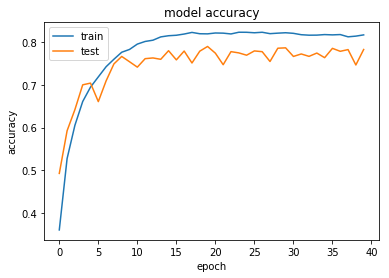

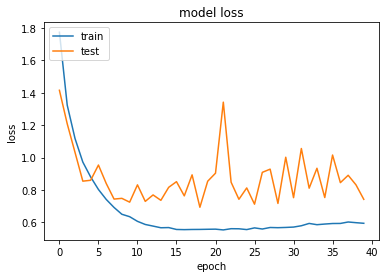

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save Model (optional)

In [16]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

## <font color='brown'> Improving the Network:</font> Data Augumentation

Using **CIFAR training set** and augment this set with multiple types
of **transformations**: 
- rotation, 
- rescaling, 
- horizontal/vertical flip, 
- zooming, 
- channel shift, etc.

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
datagen = ImageDataGenerator(
    featurewise_center=False,                  # set input mean to 0 over the dataset
    samplewise_center=False,                   # set each sample mean to 0
    featurewise_std_normalization=False,       # divide inputs by std of the dataset
    samplewise_std_normalization=False,        # divide each input by its std
    zca_whitening=False,                       # apply ZCA whitening
    rotation_range=0,                          # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,                     # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,                    # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,                      # randomly flip images
    vertical_flip=False)                       # randomly flip images

In [21]:
NB_EPOCH = 50   # change the NB_EPOCH from 20 to 50

# Training
#Keras 1
"""
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              samples_per_epoch=X_train.shape[0],
                              nb_epoch=NB_EPOCH,
                              verbose=VERBOSE)
"""
#Keras 2
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              steps_per_epoch = X_train.shape[0]/BATCH_SIZE,
                              epochs=NB_EPOCH,
                              verbose=VERBOSE)

# Testing
score = model.evaluate(X_test, Y_test,
                       batch_size=BATCH_SIZE, 
                       verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
391/390 [==============================] - 115s 295ms/step - loss: 0.9872 - acc: 0.6797
Epoch 2/50
391/390 [==============================] - 116s 297ms/step - loss: 0.9916 - acc: 0.6787
Epoch 3/50
 85/390 [=====>........................] - ETA: 1:29 - loss: 0.9917 - acc: 0.6714

KeyboardInterrupt: 

### Plot Results

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving Model

In [ ]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

## <font color='brown'> Prediciting with model</font> 

**Note:** Since we saved the model and the weights, we do not need to train every
time

In [ ]:
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

### Load Model

In [ ]:
#load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

### Load Images

In [ ]:
#load images
img_names = ['cat-standing.jpg', 'dog-standing.jpg']
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32, 32)),
                     (1, 0, 2)).astype('float32')
        for img_name in img_names]
imgs = np.array(imgs) / 255

### Train and Predictions

In [ ]:
# train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# Predictions
predictions = model.predict_classes(imgs)
print(predictions)